# Lecture 2 - Fourier reconstruction

# Contents

* The Fourier transform
* The Fourier-Slice Theorem
* Fourier reconstruction

# The Fourier transform

The Fourier transform of a function $g : \mathbb{R} \rightarrow \mathbb{R}$ is given by 

$$\widehat{g}(\xi) = \int_{\mathbb{R}} g(x) e^{-2\pi\imath x \xi} \mathrm{d}x.$$

The inverse transform is given by 

$$g(x) = \int_{\mathbb{R}} \widehat{g}(\xi) e^{2\pi\imath x \xi} \mathrm{d}\xi.$$


Similarly, for a function $g : \mathbb{R}^n \rightarrow \mathbb{R}$

$$\widehat{g}(\boldsymbol{\xi}) = \int_{\mathbb{R}^n} g(\mathbf{x}) e^{-2\pi\imath x \cdot \boldsymbol{\xi}} \mathrm{d}\mathbf{x}.$$

With inverse

$$g(\mathbf{x}) = \int_{\mathbb{R}^n} \widehat{g}(\boldsymbol{\xi}) e^{2\pi\imath x \cdot \boldsymbol{\xi}} \mathrm{d}\boldsymbol{\xi}.$$

# The Fourier-Slice Theorem

The Fourier-Slice Theorem relates the 2D-Fourier transform of $u$ to the 1D-Fourier transform of $f$:

$$\widehat{f}(\sigma,\theta) = \widehat{u}(|\sigma| \mathbf{n}_\theta),$$

with

$$\widehat{f}(\sigma,\theta) = \int_{\mathbb{R}} f(s,\theta) e^{-2\pi\imath \sigma s}\mathrm{d}s,$$

$$\widehat{u}(\mathbf{k}) = \int_{\mathbb{R}^2} u(\mathbf{x}) e^{-2\pi\imath \mathbf{k}\cdot \mathbf{x}}\mathrm{d}\mathbf{x},$$

$$\mathbf{n}_\theta = (\cos\theta,\sin\theta).$$

We can visualise this as follows

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Radon_transform_via_Fourier_transform.png/2000px-Radon_transform_via_Fourier_transform.png)

# Fourier reconstruction

* In principle, we can reconstruct the image by performing an inverse Fourier transform
* Having collected *discrete* measurements $f_{ij} = f(s_i,\theta_j)$, we only have partial information on the Fourier transform of $u$
* Ultimately, we will represent $u$ on a grid of pixels with intenties $u_i = u(\mathbf{x}_i)$

## The Discrete Fourier Transform

The *discrete Fourier transform (DFT)* of a sequence $\{g_i\}_{i=0}^n$ is defined as

$$\widehat{g}_i = \sum_{j=0}^{n-1} g_j \exp\left(-\frac{2\pi\imath}{n} ij\right), \quad i = 0, \ldots, n-1.$$

When $g_i$ samples $g$ at a grid with spacing $\Delta x$, its Fourier spectrum $\widehat{g}$ is sampled with $\Delta \xi = (n\Delta x)^{-1}$.

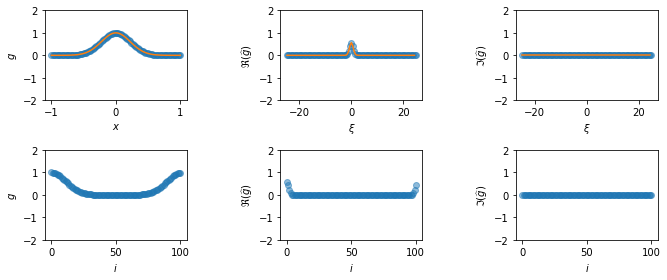

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift,ifftshift

# Fourier transform pair, see https://en.wikipedia.org/wiki/Fourier_transform#Square-integrable_functions,_one-dimensional
a = 10
g = lambda x : np.exp(-a*x**2)
gh = lambda xi : np.sqrt(np.pi/a)*np.exp(-((xi*np.pi)**2)/a)

# sampling
n = 100
x = np.linspace(-1,1,n)
xi = fftshift(fftfreq(n,x[1]-x[0]))

ns = 101
xs = ifftshift(np.linspace(-1,1,ns))
xis = fftfreq(ns,xs[1]-xs[0])

# plot
fig,ax = plt.subplots(2,3)

ax[0,0].plot(xs,g(xs),'o',alpha=.5)
ax[0,0].plot(x,g(x))
ax[0,0].set_xlabel(r'$x$')
ax[0,0].set_ylabel(r'$g$')
ax[0,0].set_ylim([-2,2])

ax[0,1].plot(xis,2*np.real(fft(g(xs)))/ns,'o',alpha=.5)
ax[0,1].plot(xi,np.real(gh(xi)))
ax[0,1].set_xlabel(r'$\xi$')
ax[0,1].set_ylabel(r'$\Re(\widehat{g})$')
ax[0,1].set_ylim([-2,2])

ax[0,2].plot(xis,2*np.imag(fft(g(xs)))/ns,'o',alpha=.5)
ax[0,2].plot(xi,np.imag(gh(xi)))
ax[0,2].set_xlabel(r'$\xi$')
ax[0,2].set_ylabel(r'$\Im(\widehat{g})$')
ax[0,2].set_ylim([-2,2])

ax[1,0].plot(g(xs),'o',alpha=.5)
ax[1,0].set_xlabel(r'$i$')
ax[1,0].set_ylabel(r'$g$')
ax[1,0].set_ylim([-2,2])

ax[1,1].plot(2*np.real(fft(g(xs)))/ns,'o',alpha=.5)
ax[1,1].set_xlabel(r'$i$')
ax[1,1].set_ylabel(r'$\Re(\widehat{g})$')
ax[1,1].set_ylim([-2,2])

ax[1,2].plot(2*np.imag(fft(g(xs)))/ns,'o',alpha=.5)
ax[1,2].set_xlabel(r'$i$')
ax[1,2].set_ylabel(r'$\Im(\widehat{g})$')
ax[1,2].set_ylim([-2,2])


fig.tight_layout()
fig.set_figwidth(10)

plt.savefig('./figures/lecture2/fourier1.png',dpi=300)

We need to be carefull when trying to relate the samples $g_i, \widehat{g}_i$ to the underlying functions $g, \widehat{g}$.

![](./figures/lecture2/fourier1.png)

In matrix-vector notation, we express this as

$$\widehat{\mathbf{g}} = F\mathbf{g},$$

with $F_{ij} = \exp\left(-\frac{2\pi\imath}{n} ij\right)$.

The inverse is given by

$$F^{-1} = n^{-1} F^*.$$

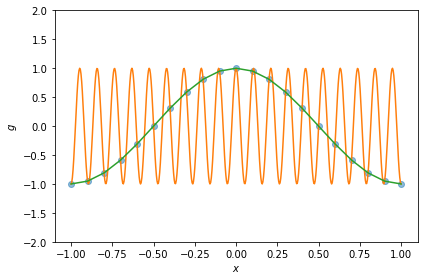

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift,ifftshift

# Fourier transform pair, see https://en.wikipedia.org/wiki/Fourier_transform#Square-integrable_functions,_one-dimensional
a = 19*np.pi
g = lambda x : np.cos(a*x)

# sampling
n = 500
x = np.linspace(-1,1,n)
xi = fftshift(fftfreq(n,x[1]-x[0]))

ns = 21
xs = np.linspace(-1,1,ns)
xis = fftfreq(ns,xs[1]-xs[0])

# plot
fig,ax = plt.subplots(1,1)

ax.plot(xs,g(xs),'o',alpha=.5)
ax.plot(x,g(x))
ax.plot(xs,np.real(ifft(fft(g(xs)))))
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$g$')
ax.set_ylim([-2,2])

fig.tight_layout()

plt.savefig('./figures/lecture2/fourier2.png',dpi=300)

Be aware that some interesting things may happen with the DFT, when subsampling or truncating the signals.

![](./figures/lecture2/fourier2.png)

## The Fast Fourier Transform

A naive implementation would require $\mathcal{O}(n^2)$ operations to multiply by $F$. With some clever tricks, however, it can be done in $\mathcal{O}(n\log n)$.

## Interpolation

* Applying the Fourier transform to $f_{ij}$ gives us samples of $\widehat{u}$ at wavenumbers $\{(\sigma_i \mathbf{n}_{\theta_j})\}$, with $\sigma_i = i \cdot (n_s \Delta s)^{-1}$ (assuming again that $f_{ij} = f(i \cdot \Delta s ,
\theta_j)$)
* To usefully apply the inverse DFT, we need $\widehat{u}$ at wavenumbers $\{(i\cdot (n_x \Delta x)^{-1}, j\cdot (n_y \Delta y)^{-1})\}$.

An interpolation scheme computes each $\widehat{u}$ at $\{(i\cdot (n_x \Delta x)^{-1}, j\cdot (n_y \Delta y)^{-1})\}$ from nearby available values.

* Linear interpolation uses 3 nearby points
* Bi-linear interplation uses 4 nearby points

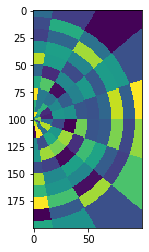

In [133]:
import numpy as np

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as mpl

from scipy.interpolate import interp1d
from scipy.ndimage import map_coordinates


def polar2cartesian(r, t, grid, x, y, order=3):
    """
    Copied from https://stackoverflow.com/questions/2164570/reprojecting-polar-to-cartesian-grid
    """
    X, Y = np.meshgrid(x, y)

    new_r = np.sqrt(X*X+Y*Y)
    new_t = np.arctan2(X, Y)

    ir = interp1d(r, np.arange(len(r)), bounds_error=False)
    it = interp1d(t, np.arange(len(t)))

    new_ir = ir(new_r.ravel())
    new_it = it(new_t.ravel())

    new_ir[new_r.ravel() > r.max()] = len(r)-1
    new_ir[new_r.ravel() < r.min()] = 0

    return map_coordinates(grid, np.array([new_ir, new_it]),
                            order=order).reshape(new_r.shape)

# Define original polar grid

nr = 10
nt = 10

r = np.linspace(1, 100, nr)
t = np.linspace(0., np.pi, nt)
z = np.random.random((nr, nt))

# Define new cartesian grid

nx = 100
ny = 200

x = np.linspace(0., 100., nx)
y = np.linspace(-100., 100., ny)

# Interpolate polar grid to cartesian grid (nearest neighbor)

fig = mpl.figure()
ax = fig.add_subplot(111)
ax.imshow(polar2cartesian(r, t, z, x, y, order=0))


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.transform import radon
from scipy.fft import fft2, ifft2, fft, ifft, fftfreq, fftshift
from scipy.interpolate import LinearNDInterpolator

# settings
nx = 32
na = 32
theta = np.linspace(0., 180., na)
s = np.linspace(-1,1,nx)

# phantom
ii,jj = disk((nx//2+nx//8,nx//2+nx//8),0.2 * (nx//2))

u = np.zeros((nx,nx))
u[ii,jj] = 1

# sinogram
f = radon(u, theta=theta)

# fourier transform of sinogram
fh = fft(fftshift(f,axes=0),axis=0)
sigma = fftfreq(nx,s[1]-s[0])
kk1 = np.outer(sigma,np.cos(np.pi*theta/180))
kk2 = np.outer(sigma,-np.sin(np.pi*theta/180))

# target grid
k = fftfreq(nx,(s[1]-s[0]))
kt1,kt2 = np.meshgrid(k,k)

# interpolation
uh = LinearNDInterpolator(np.stack((kk1.ravel(),kk2.ravel()),axis=1),fh.ravel(),fill_value=0)(kt1,kt2)
#uh = griddata((kk1.ravel(),kk2.ravel()),fh.ravel(),(kt1.ravel(),kt2.ravel()),fill_value=0)]

# ifft
ur = np.real(fftshift(ifft2(uh.reshape(nx,nx))))

/opt/anaconda3/envs/astra/lib/python3.7/site-packages/skimage/transform/radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])


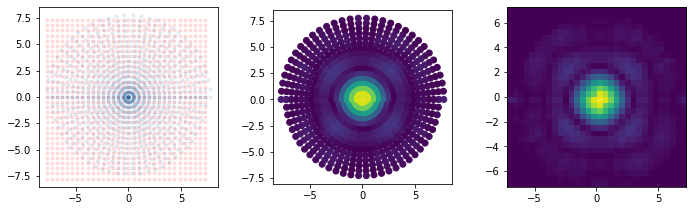

In [2]:
fig,ax = plt.subplots(1,3)

ax[0].plot(kk1.ravel(),kk2.ravel(),'.',alpha=.1)
ax[0].plot(kt1.ravel(),kt2.ravel(),'r.',alpha=.1)
ax[0].set_aspect(1)

ax[1].scatter(kk1.ravel(),kk2.ravel(),c=np.abs(fh.ravel()))
ax[1].set_aspect(1)

ax[2].imshow(np.abs(fftshift(uh.reshape(nx,nx))),extent=(-max(k),max(k),-max(k),max(k)))
ax[2].set_aspect(1)

fig.tight_layout()
fig.set_figwidth(10)

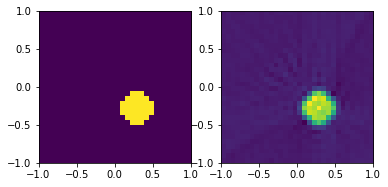

In [3]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(u,extent=(-1,1,-1,1))
ax[1].imshow(ur,extent=(-1,1,-1,1))

Representing the sinogram and image as vectors, the image recontruction step can be represented as 

$$\mathbf{u} = (F^{-1} \otimes F^{-1}) T (I \otimes F) \mathbf{f}.$$

In Python, we would implement this as 

```python
u .. 
```

## The Non-Uniform Fourier Transform

We can avoid the interpolation step by applying a *non-uniform FFT*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import disk
from skimage.transform import radon
from scipy.fft import fft2, ifft2, fft, ifft, fftfreq, fftshift
from scipy.interpolate import LinearNDInterpolator

from pynufft import NUFFT

# settings
nx = 32
na = 32
theta = np.linspace(0., 180., na)
s = np.linspace(-1,1,nx)

# phantom
ii,jj = disk((nx//2+nx//8,nx//2+nx//8),0.2 * (nx//2))

u = np.zeros((nx,nx))
u[ii,jj] = 1

# sinogram
f = radon(u, theta=theta)

# fourier transform of sinogram
fh = fft(fftshift(f,axes=0),axis=0)
sigma = fftfreq(nx,s[1]-s[0])
kk1 = np.outer(sigma,np.cos(np.pi*theta/180))
kk2 = np.outer(sigma,-np.sin(np.pi*theta/180))

# target grid
k = fftfreq(nx,(s[1]-s[0]))
kt1,kt2 = np.meshgrid(k,k)

# interpolation
uh = LinearNDInterpolator(np.stack((kk1.ravel(),kk2.ravel()),axis=1),fh.ravel(),fill_value=0)(kt1,kt2)
#uh = griddata((kk1.ravel(),kk2.ravel()),fh.ravel(),(kt1.ravel(),kt2.ravel()),fill_value=0)]

# ifft
ur = np.real(fftshift(ifft2(uh.reshape(nx,nx))))

/opt/anaconda3/lib/python3.8/site-packages/skimage/transform/radon_transform.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  coords = np.array(np.ogrid[:image.shape[0], :image.shape[1]])
